In [1]:
import datasets
import pyarrow as pa

# load a single file of the dataset
ds = datasets.load_dataset(
    'approximatelabs/tablib-v1-sample',
    #token='...',
)

df = ds['train'].to_pandas()

tables = [pa.RecordBatchStreamReader(b).read_all() for b in df['arrow_bytes']]

Resolving data files:   0%|          | 0/77 [00:00<?, ?it/s]

In [46]:
len(tables)

1304339

In [19]:
# compute the distribution of column and row numbers
import numpy as np
n_rows_array = np.zeros(len(tables))
n_cols_array = np.zeros(len(tables))
#remove tables with 0 rows
tables = [t for t in tables if t.num_rows > 0]

for i, table in enumerate(tables):
    n_rows_array[i] = table.num_rows
    n_cols_array[i] = table.num_columns


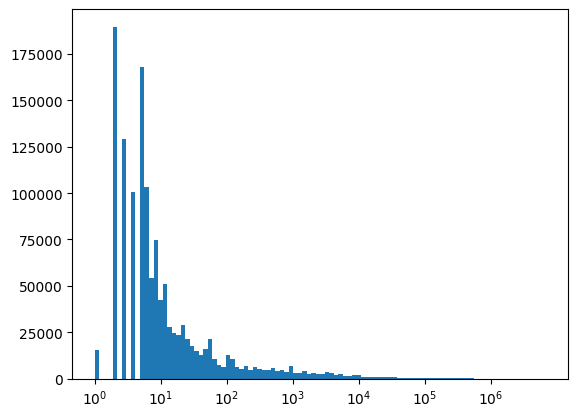

In [25]:
# plot the distribution of column and row numbers
import matplotlib.pyplot as plt
plt.hist(np.log10(n_rows_array), bins=100)
# x-axis labels should be 10^x
plt.xticks(np.arange(0, 7, 1), [r'$10^{}$'.format(i) for i in range(0, 7)])
plt.show()

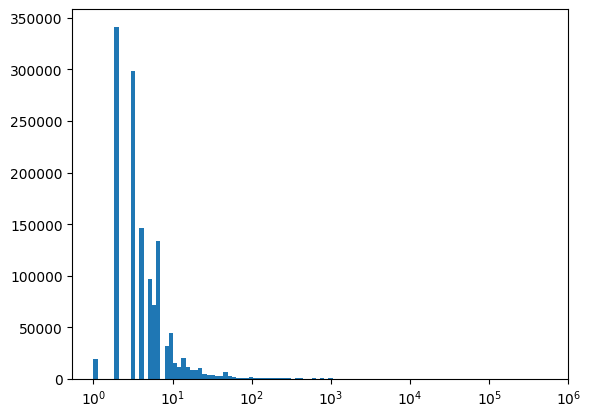

In [31]:
# plot the distribution of column and row numbers
import matplotlib.pyplot as plt
plt.hist(np.log10(n_cols_array), bins=100)
# x-axis labels should be 10^x
plt.xticks(np.arange(0, 7, 1), [r'$10^{}$'.format(i) for i in range(0, 7)])
plt.show()

In [34]:
# print quantiles
print('row quantiles:')
print(np.quantile(n_rows_array, [0.75, 0.9, 0.95, 0.97, 0.99]))
print('column quantiles:')
print(np.quantile(n_cols_array, [0.75, 0.9, 0.95,  0.97, 0.99]))

row quantiles:
[   16.     112.     662.    1865.   10647.62]
column quantiles:
[ 7. 10. 17. 23. 54.]


In [48]:
# proportion with > 2 columns and > 100 rows
print('proportion with > 3 columns and > 1000 rows:')
print(np.mean((n_cols_array > 3) & (n_rows_array > 1000)))

proportion with > 3 columns and > 1000 rows:
0.028868262008572926


In [40]:
tables_accepted = [t for t in tables if (t.num_columns > 3) & (t.num_rows > 1000)]

In [58]:
tables_accepted[9342]

pyarrow.Table
Area: string
MTU: string
Biomass  - Actual Aggregated [MW]: double
Fossil Brown coal/Lignite  - Actual Aggregated [MW]: string
Fossil Coal-derived gas  - Actual Aggregated [MW]: string
Fossil Gas  - Actual Aggregated [MW]: double
Fossil Hard coal  - Actual Aggregated [MW]: double
Fossil Oil  - Actual Aggregated [MW]: double
Fossil Oil shale  - Actual Aggregated [MW]: string
Fossil Peat  - Actual Aggregated [MW]: string
Geothermal  - Actual Aggregated [MW]: string
Hydro Pumped Storage  - Actual Aggregated [MW]: double
Hydro Pumped Storage  - Actual Consumption [MW]: double
Hydro Run-of-river and poundage  - Actual Aggregated [MW]: double
Hydro Water Reservoir  - Actual Aggregated [MW]: string
Marine  - Actual Aggregated [MW]: string
Nuclear  - Actual Aggregated [MW]: double
Other  - Actual Aggregated [MW]: double
Other renewable  - Actual Aggregated [MW]: string
Solar  - Actual Aggregated [MW]: double
Waste  - Actual Aggregated [MW]: string
Wind Offshore  - Actual Aggregat

In [50]:
0.0288682620 * 867 * 0.1

2.5028783154000003

In [3]:
import pandas as pd

In [6]:
!pwd

/Users/leo/VSCProjects/lm_tab


In [8]:
df = pd.read_parquet("data/data/movies.parquet")

In [10]:
df

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,target,vote_average,vote_count,name
0,60000000.0,Action,en,17.924927,Regency Enterprises,United States of America,1995,8.272855,7.7,1886.0,<Heat_(1995_film)>
1,35000000.0,Action,en,5.231580,Universal Pictures,United States of America,1995,7.808550,5.5,174.0,<Sudden_Death_(1995_film)>
2,52000000.0,Drama,en,10.137389,Universal Pictures,United States of America,1995,8.064879,7.8,1343.0,<Casino_(1995_film)>
3,50000000.0,Action,en,11.065939,Silver Pictures,United States of America,1995,7.481487,6.0,394.0,<Assassins_(1995_film)>
4,0.0,Drama,en,0.894647,Miramax,South Africa,1995,5.830284,6.7,13.0,"<Cry,_the_Beloved_Country_(1995_film)>"
...,...,...,...,...,...,...,...,...,...,...,...
6202,0.0,Crime,it,4.675250,Rai Cinemafiction,Italy,2000,6.256690,7.8,116.0,<One_Hundred_Steps>
6203,2196531.0,Comedy,fi,0.947509,Talent House,Finland,2005,6.382304,5.6,10.0,<FC_Venus>
6204,0.0,Romance,en,0.504000,Enlight Pictures,China,2014,7.880814,6.0,4.0,<My_Old_Classmate>
6205,0.0,Drama,ru,0.181963,Yellow,Russia,2012,4.156943,5.7,3.0,<And_Here's_What's_Happening_to_Me>
